<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/CPSC541_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Automobile Data set**



In this notebook I will explore the Automobile data set from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)

Apply Data Analysis, Data Visualization and Predictive Modeling

1.Data acquisition

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv

--2024-09-16 17:50:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24916 (24K) [text/csv]
Saving to: ‘auto.csv’

auto.csv            100%[===================>]  24.33K  --.-KB/s    in 0.003s  

2024-09-16 17:50:45 (7.12 MB/s) - ‘auto.csv’ saved [24916/24916]



2.Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

3.Put the data into a data frame

In [ ]:
df = pd.read_csv('auto.csv')
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


4. Add headers to the data

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


5. Deal with missing values

In [ ]:
#Missing data has the ? sign
#let's change it to NAN
df.replace('?',np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Now- lets drop the lines that has missing values

In [ ]:
df_clean = df.dropna()
df_clean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


Next- Lets recreate the figures from the book.
We will start with evaluating the factors that explain mpg : miles-per-galon gasoline use of the cars.
lets fit a linear regression to evaluate mpg ~ horsepower, but first- lets check the dtypes to make sure we can run a regression with these variables

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df_clean.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


We will need to fix the dtypes of some of these data to be able to use it for regression analysis:

In [ ]:
df_clean[['normalized-losses','horsepower','peak-rpm','price']] = df_clean[['normalized-losses','horsepower','peak-rpm','price']].astype('int64')
df_clean[['bore','stroke']] = df_clean[['bore','stroke']].astype('float64')

<ipython-input-15-be06e666869f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['normalized-losses','horsepower','peak-rpm','price']] = df_clean[['normalized-losses','horsepower','peak-rpm','price']].astype('int64')
<ipython-input-15-be06e666869f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['bore','stroke']] = df_clean[['bore','stroke']].astype('float64')


6. correct data format

In [ ]:
df_clean.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


11. Visualize Correlations


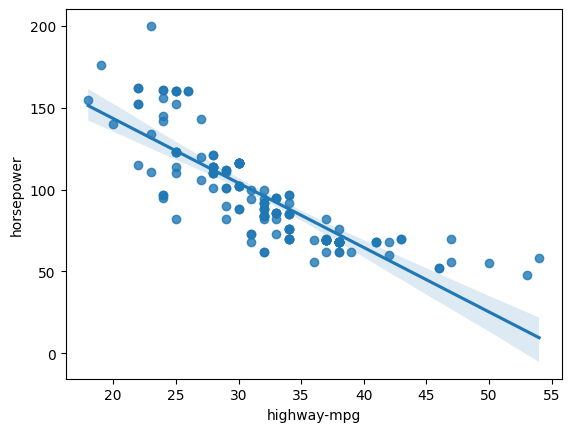

In [ ]:
sb.regplot(x='highway-mpg',y='horsepower', data=df_clean)
plt.show()

Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'highway-mpg'.

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_clean['highway-mpg'],df_clean['horsepower'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.8279410511954653  with a P-value of P = 2.8102941020684094e-41


Since the p-value is  <  0.001, the correlation between horsepower and highway-mpg is statistically significant, with a strong linear relationship (~0.83)

**Let's start with Simple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
Y = df_clean[['highway-mpg']]
X = df_clean[['horsepower']]

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[31.00874752],
       [28.74556501],
       [29.61601982],
       [24.39329094],
       [31.18283849]])

In [ ]:
lm.intercept_

array([48.76602573])

In [ ]:
lm.coef_

array([[-0.17409096]])

Lets plot the residuals vs fitted values next

   highway-mpg
2    -1.008748
3    -6.745565
5    -4.616020
7    -4.393291
9    -2.182838


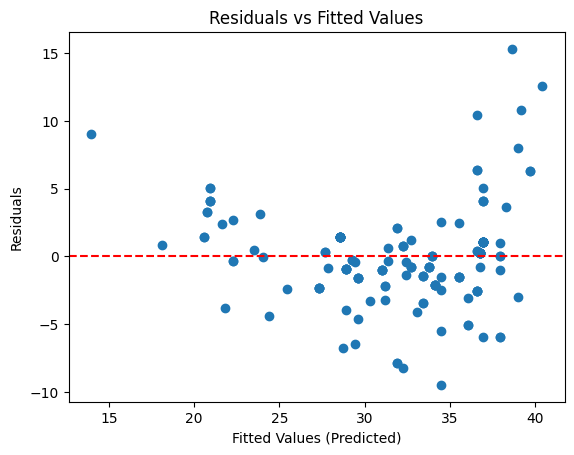

In [ ]:

y_hat = lm.predict(X)
residuals = Y - y_hat

print(residuals.head())


# Create a scatter plot of residuals vs. fitted values
plt.scatter(y_hat, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

#plot_df = [residuals,y_hat]
#plot_df.head()

#sb.regplot(x=lm.predict(X),y= X-lm.predict(X))
#plt.show()

The fitted line here is the expected trendline for the scatter. It does not actually fit. Lets try to see if we can fit a smoothed line to see what that looks like

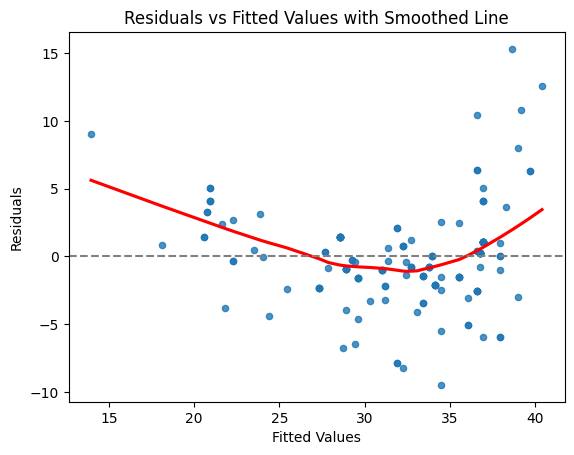

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a residuals vs fitted plot with a smoothed LOWESS line
sns.regplot(x=y_hat, y=residuals, lowess=True, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values with Smoothed Line')
plt.show()

That is a very bendy line- implying that the relationship between the predictor and the response is **not linear**.
- Let's folow the advice from the book- and fit an extra term that is hp-squared

In [ ]:
hp_squared = X ** 2
print(hp_squared)

     horsepower
2         10404
3         13225
5         12100
7         19600
9         10201
..          ...
199       12996
200       25600
201       17956
202       11236
203       12996

[159 rows x 1 columns]


need to fix the header

In [ ]:
# Rename the squared columns (optional but helps to clarify)
hp_squared.columns = [f'{col}_squared' for col in X.columns]

In [ ]:
X1 = pd.concat ([ X , hp_squared], axis =1)
print(X1.head())

   horsepower  horsepower_squared
2         102               10404
3         115               13225
5         110               12100
7         140               19600
9         101               10201


**Now let's try Multiple Linear Regression**

In [ ]:
lm.fit(X1,Y)
lm

LinearRegression()

In [ ]:
yhat_new = lm.predict(X1)

In [ ]:
lm.coef_

array([[-0.53738723,  0.00165528]])

In [ ]:
lm.intercept_

array([66.82778304])

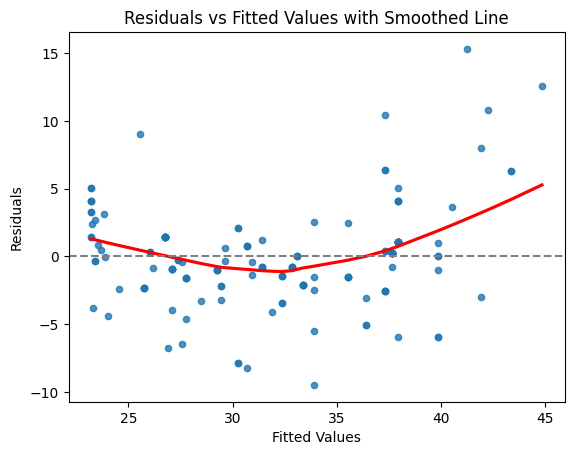

In [ ]:
residuals_new = Y - yhat_new

# Create a residuals vs fitted plot with a smoothed LOWESS line
sns.regplot(x=yhat_new, y=residuals, lowess=True, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values with Smoothed Line')
plt.show()

Better than before- but not perfect.

**Let's Visualize the difference between Fitted Data and Actual Data**

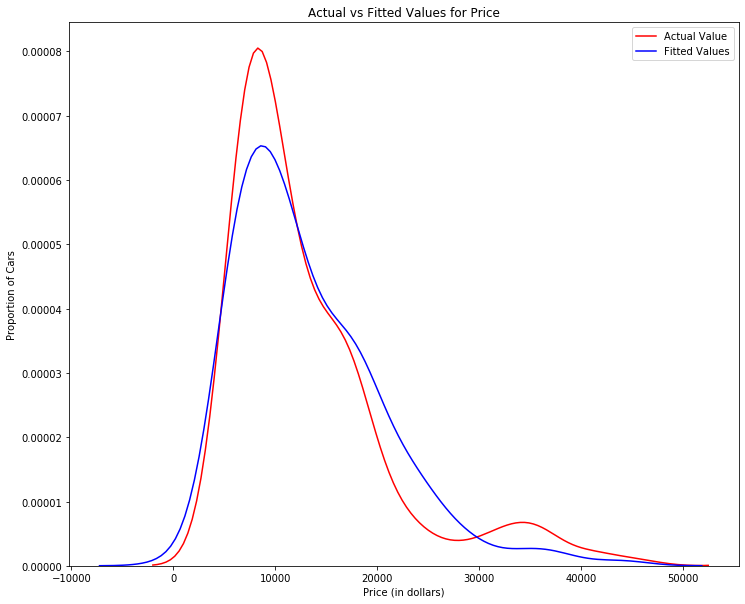

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sb.distplot(y, hist=False, color="r", label="Actual Value")
sb.distplot(yhatt, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()